In [43]:
from shapely.geometry import Point, Polygon, LineString
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import math

plt.style.use('ggplot')
%matplotlib inline

In [44]:
# supdir =  Reemplaza con el directorio donde vayas a trabajar. Aquí debe de estar un subdirectorio llamado "tren-ligero"
supdir = '.'

In [45]:
basedir = os.path.join(supdir, 'tren-ligero', 'tren_ligero-gdl')
basedir

directorio = os.path.join(basedir, 'lineas', 'c_tren_l1.shp')
mi_shp = gpd.read_file(directorio)
mi_shp

,OID_,Name,FolderPath,geometry
0,0,Línea 1,SiteurLínea 1,"LINESTRING Z (666639.364 2279504.599 0, 667183..."


Dada la forma en la que tenemos organizada la información (carpetas), crearemos una función para leer. El ejemplo es de las líneas del tren ligero. 

In [46]:
def get_shp_files(basedir, object_type, file_type='.shp'):
    """ Lectura de archivos SHP anidados
    
    Este método nos permitirá leer archivos SHP que se encuetran en subcarpetas.
    
    Parámetros
    
    basedir: Directorio base en el cual se encuentran nuestras subcarpetas con archivos shp.
    object_type: Tipo de mapa a leer (las carpetas que descargamos traen muchos tipos dentro).
    file_type: Constante para solo leer archivos .shp
    """
    # Empezamos con el código diciéndonos qué rayos está leyendo
    print(f'--> Initiating with {file_type} file reading over {object_type} type of files.')
    
    # Juntamos el directorio original con el tipo de mapa a leer.
    final_dir = os.path.join(basedir, object_type)
    
    # Juntando todos los archivos del directorio
    existing_files = os.listdir(final_dir)
    
    # Variable respuesta, aquí tendremos todos los archivos
    returning_files = {}
    
    # Recorriendo archivo por archivo
    for existing_file in existing_files:

        # Condicional: ¿El archivo en cuestión es de los que nos interesan?
        if file_type in existing_file:

            # En efecto lo es, quítale la extensión ".shp"
            file_name = existing_file.strip(file_type)
            
            print(f'--> Found file {file_type}: {file_name}.')
                                            
            # Nuevo path: El específico para el archivo shp
            path_to_specific_file = os.path.join(final_dir, existing_file)
            
            # Leyéndolo con geopandas
            returning_files[file_name] = gpd.read_file(path_to_specific_file)
    
    # Listo
    print(f'Done with file seek over {object_type}.')
    return returning_files

In [47]:
# Pongamos a prueba la función.


# Leyendo el mapa de líneas del tren ligero
lineas = get_shp_files(basedir=basedir,object_type='lineas')

# Leyendo el mapa de estaciones del tren ligero
estaciones = get_shp_files(basedir=basedir,object_type='estaciones')

--> Initiating with .shp file reading over lineas type of files.
--> Found file .shp: c_tren_l1.
--> Found file .shp: c_tren_l2.
--> Found file .shp: c_tren_l3.
Done with file seek over lineas.
--> Initiating with .shp file reading over estaciones type of files.
--> Found file .shp: c_est_tren_l1.
--> Found file .shp: c_est_tren_l2.
--> Found file .shp: c_est_tren_l3.
Done with file seek over estaciones.


Parece que tenemos un ligero cochinero, pero accedamos al mismo archivo que leímos hace rato: 

In [48]:
# Viendo como acceder a estaciones
print(estaciones.keys())
# ¿Cómo se ven las estaciones?
estaciones['c_est_tren_l1']

dict_keys = (['c_est_tren_l1', 'c_est_tren_l2','c_est_tren_l1'])

dict_keys(['c_est_tren_l1', 'c_est_tren_l2', 'c_est_tren_l3'])


In [49]:
# Graficando estaciones línea 1
estaciones_l1= estaciones['c_est_tren_l1']
linea1 = lineas['c_tren_l1']

estaciones_l1.crs

<Projected CRS: EPSG:32613>
Name: WGS 84 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 108°W and 102°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Northwest Territories (NWT); Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-108.0, 0.0, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Notamos que el CRS está raro (el estándar es 4326)

In [50]:
# Setteando CRS a algo típico
estaciones_l1 = estaciones_l1.to_crs('EPSG:4326')
linea1 = linea1.to_crs('EPSG:4326')

estaciones_l1

,Id,NOMBRE,Detalle,geometry
0,0,ESTACION PERIFERICO SUR,Superficie,POINT (-103.40073 20.60719)
1,0,ESTACION SANTUARIO MARTIRES DE CRISTO REY,Superficie,POINT (-103.39559 20.61375)
2,0,ESTACION ESPAÑA,Superficie,POINT (-103.38936 20.62142)
3,0,ESTACION PATRIA,Superficie,POINT (-103.38492 20.62674)
4,0,ESTACION ISLA RAZA,Superficie,POINT (-103.38054 20.63275)
5,0,ESTACION 18 DE MARZO,Superficie,POINT (-103.37689 20.63814)
6,0,ESTACION URDANETA,Superficie,POINT (-103.37272 20.64311)
7,0,ESTACION UNIDAD DEPORTIVA,Superficie,POINT (-103.3691 20.64736)
8,0,ESTACION SANTA FILOMENA,Superficie,POINT (-103.36366 20.65423)
9,0,ESTACION WASHINGTON,Subterranea,POINT (-103.35744 20.66104)


¿Qué tal si de una graficamos todo? 

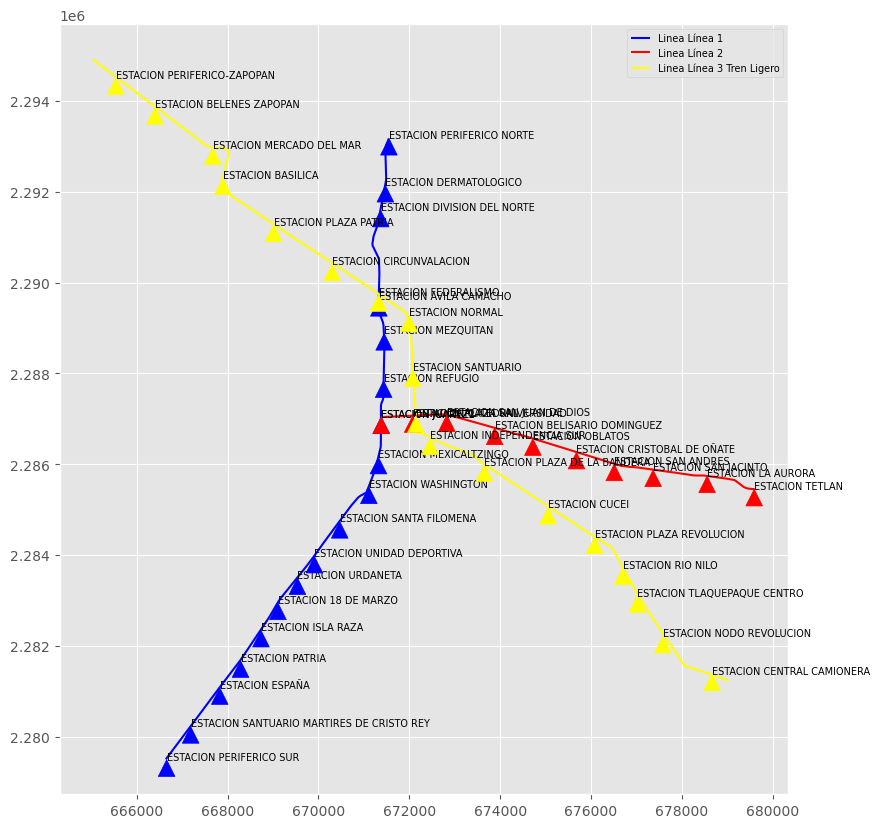

In [51]:
# Definiendo el espacio de graficado
fig, ax = plt.subplots(figsize=(30, 10))

# Constante para la fuente
fontsize = 7

# Diccionario de colores: Uno para cada línea
colors = {0: 'blue', 1: 'red', 2: 'yellow'}

for index in range(len(lineas)):
    linea_key = list(lineas.keys())[index]

    estacion_key = list(estaciones.keys())[index]

    if 'NOMBRE' in lineas[linea_key].columns:
        linea_col= 'Nombre1'
    else:
        linea_col = 'Name'

    if 'NOMBRE' in estaciones[estacion_key].columns:
        estacion_col = 'NOMBRE'
    else:
        estacion_col = 'Name'

    linea_name = lineas[linea_key][linea_col].iloc[0]
    
    lineas[linea_key].plot(ax=ax, color=colors[index], label=f'Linea {linea_name}')

    points = estaciones[estacion_key].apply(
        lambda x: [y for y in x['geometry'].coords[0]], axis=1
    )
    for point_idx, point in enumerate(points):
        angle = 0
    
        x, y = point[0], point[1]
    
        estacion_name = estaciones[estacion_key].loc[point_idx, estacion_col]
    
        estacion_name.split('ESTACION ')[1].strip()
    
        ax.annotate(estacion_name,
                    (x, y),
                    fontsize=fontsize,
                    rotation=angle, 
                    arrowprops=dict(color=colors[index])
                    )
ax.legend(fontsize=fontsize)
plt.show()

In [52]:
lineas[linea_key][linea_col].iloc[0]
'Linea 3 Tren Ligero'

'Linea 3 Tren Ligero'

In [53]:
import geopandas as gpd

# Cargar los archivos
colonias = gpd.read_file("colonias/Colonias.shp")

print("Información de las Colonias:")
print(colonias.info())  # Muestra las columnas y tipos de datos
print("\nPrimeras filas del archivo de Colonias:")
print(colonias.head())  # Muestra las primeras filas

Información de las Colonias:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CP_COLONIA  1150 non-null   float64 
 1   MUNICIPIO   1150 non-null   object  
 2   COLONIA     1150 non-null   object  
 3   geometry    1150 non-null   geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 36.1+ KB
None

Primeras filas del archivo de Colonias:
   CP_COLONIA    MUNICIPIO              COLONIA  \
0         0.0  TLAQUEPAQUE     MIRADOR EL ALAMO   
1         0.0  TLAQUEPAQUE             SAN JUAN   
2         0.0       TONALA   LOMAS DEL CAMICHIN   
3         0.0       TONALA  LOMAS DE LA SOLEDAD   
4         0.0       TONALA  LOMAS DEL MANANTIAL   

                                            geometry  
0  POLYGON ((674657.966 2281812.001, 674792.992 2...  
1  POLYGON ((681746.844 2277432.748, 681666.8 227...  
2  POLYGON ((679310.5

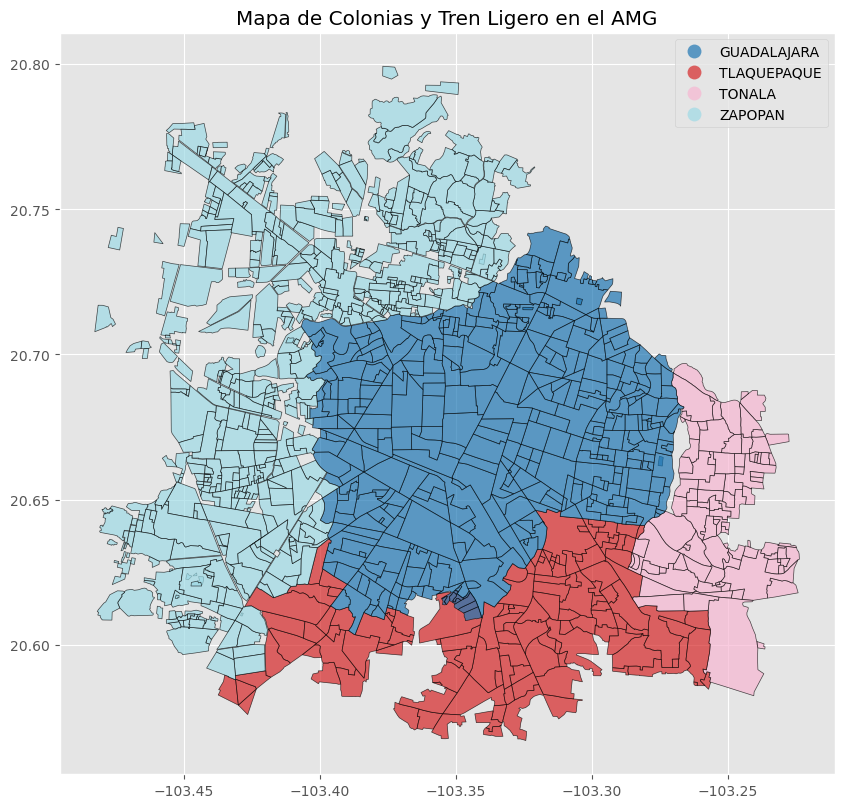

In [54]:
colonias = gpd.read_file("colonias/Colonias.shp")
colonias = colonias.to_crs("EPSG:4326")

fig, ax = plt.subplots(figsize=(10, 10))
colonias.plot(column="MUNICIPIO", cmap="tab20", legend=True, ax=ax, edgecolor="black", alpha=0.7)

ax.set_title("Mapa de Colonias y Tren Ligero en el AMG")
plt.show()

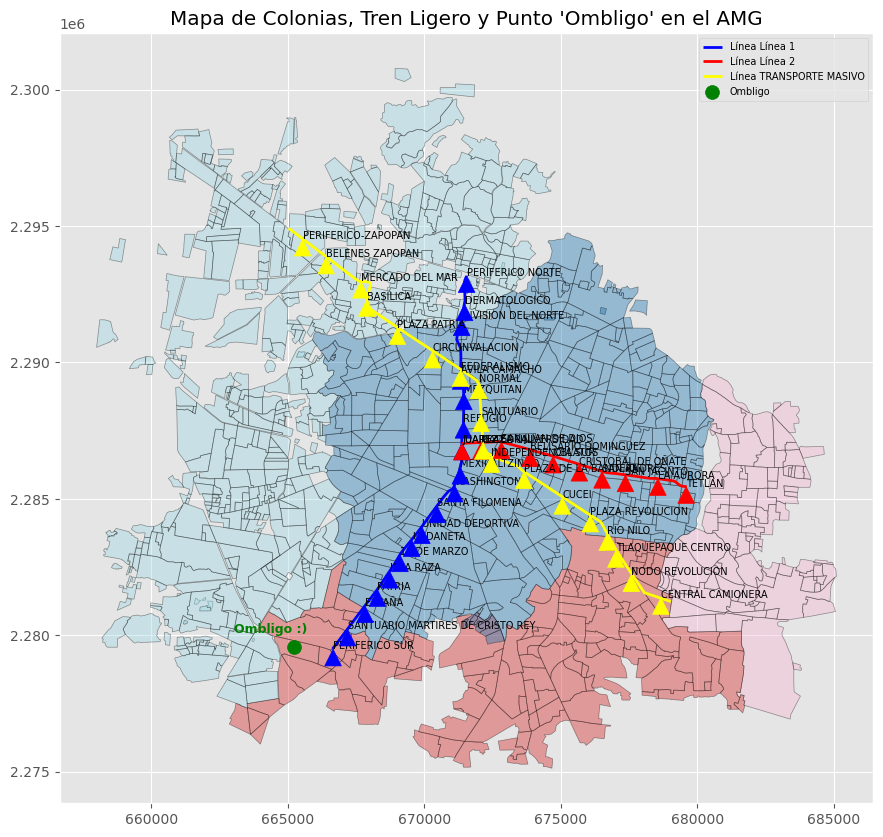

In [55]:
if colonias.crs != lineas[list(lineas.keys())[0]].crs:
    colonias = colonias.to_crs(lineas[list(lineas.keys())[0]].crs)

if estaciones[list(estaciones.keys())[0]].crs != colonias.crs:
    estaciones = {key: estaciones[key].to_crs(colonias.crs) for key in estaciones}

latitud = 20.6082152
longitud = -103.4146271
geometry = [Point(longitud, latitud)]

gdf_ombligo = gpd.GeoDataFrame(
    {"Nombre": ["Ombligo"], "Latitud": [latitud], "Longitud": [longitud], "geometry": geometry},
    crs="EPSG:4326"
)

gdf_ombligo = gdf_ombligo.to_crs(colonias.crs)

fig, ax = plt.subplots(figsize=(15, 10))

colonias.plot(column="MUNICIPIO", cmap="tab20", legend=True, ax=ax, edgecolor="black", alpha=0.4)

colors = {0: 'blue', 1: 'red', 2: 'yellow'}

for index in range(len(lineas)):
    linea_key = list(lineas.keys())[index]
    estacion_key = list(estaciones.keys())[index]

    linea_col = 'NOMBRE' if 'NOMBRE' in lineas[linea_key].columns else 'Name'
    estacion_col = 'NOMBRE' if 'NOMBRE' in estaciones[estacion_key].columns else 'Name'

    linea_name = lineas[linea_key][linea_col].iloc[0]
    lineas[linea_key].plot(ax=ax, color=colors[index], label=f'Línea {linea_name}', linewidth=2)

    points = estaciones[estacion_key].apply(lambda x: [y for y in x['geometry'].coords[0]], axis=1)

    for point_idx, point in enumerate(points):
        x, y = point[0], point[1]
        estacion_name = estaciones[estacion_key].loc[point_idx, estacion_col]

        estacion_name = estacion_name.split('ESTACION ')[-1].strip()

        ax.annotate(
            estacion_name,
            (x, y),
            fontsize=7,
            rotation=0,
            arrowprops=dict(color=colors[index])
        )

gdf_ombligo.plot(ax=ax, color='green', markersize=100, label="Ombligo")

ax.annotate(
    "Ombligo :)",
    (gdf_ombligo.geometry.x[0], gdf_ombligo.geometry.y[0]), 
    fontsize=9,
    fontweight="bold",
    color="green",
    ha="right",
    xytext=(10, 10), 
    textcoords='offset points'
)

xmin, ymin, xmax, ymax = colonias.total_bounds
x_margin = (xmax - xmin) * 0.05
y_margin = (ymax - ymin) * 0.05

ax.set_xlim(xmin - x_margin, xmax + x_margin)
ax.set_ylim(ymin - y_margin, ymax + y_margin)

ax.legend(fontsize=7)
ax.set_title("Mapa de Colonias, Tren Ligero y Punto 'Ombligo' en el AMG")

plt.show()

In [56]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Haversine
    """
    R = 6371  # Radio de la Tierra en km
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c 


lat_omb, lon_omb = 20.6082152, -103.4146271

lat_periferico, lon_periferico = 20.607186834339043, -103.4007340141827

distancia_km = haversine(lat_omb, lon_omb, lat_periferico, lon_periferico)

print(f"La distancia entre Periférico y El Ombligo es de {distancia_km:.2f} km")


La distancia entre Periférico y El Ombligo es de 1.45 km
